In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('Customer_Churn_Dataset.csv')
df.head()


,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,InternetService,Contract,MonthlyCharges,TotalCharges,Churn
0,CUST0001,Male,1,No,No,41,Yes,Fiber optic,Month-to-month,96.72,3485.28,No
1,CUST0002,Male,1,Yes,No,15,No,Fiber optic,One year,36.75,3906.29,No
2,CUST0003,Female,0,Yes,No,15,Yes,Fiber optic,Month-to-month,44.80,6363.96,No
3,CUST0004,Male,0,No,No,16,No,No,Two year,95.16,2040.56,Yes
4,CUST0005,Male,1,Yes,No,46,Yes,Fiber optic,Month-to-month,64.17,7464.55,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       100 non-null    object 
 1   Gender           100 non-null    object 
 2   SeniorCitizen    100 non-null    int64  
 3   Partner          100 non-null    object 
 4   Dependents       100 non-null    object 
 5   Tenure           100 non-null    int64  
 6   PhoneService     100 non-null    object 
 7   InternetService  100 non-null    object 
 8   Contract         100 non-null    object 
 9   MonthlyCharges   100 non-null    float64
 10  TotalCharges     100 non-null    float64
 11  Churn            100 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 9.5+ KB


In [9]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,100.00,100.000000,100.000000,100.000000
mean,0.45,34.080000,67.119300,4122.648700
std,0.50,19.985186,29.566012,2265.339754
min,0.00,0.000000,20.230000,103.740000
25%,0.00,16.000000,41.010000,2448.860000
50%,0.00,35.000000,66.135000,4426.235000
75%,1.00,49.500000,95.415000,6084.845000
max,1.00,69.000000,119.520000,7912.550000


In [11]:
df.isnull().sum()

CustomerID         0
Gender             0
SeniorCitizen      0
Partner            0
Dependents         0
Tenure             0
PhoneService       0
InternetService    0
Contract           0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64

In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [19]:
df.drop('CustomerID', axis=1, inplace=True)

In [21]:
label_enc = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = label_enc.fit_transform(df[col])

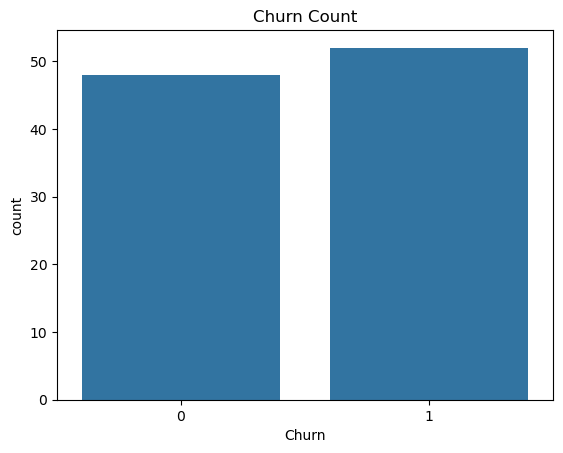

In [23]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Count")
plt.show()

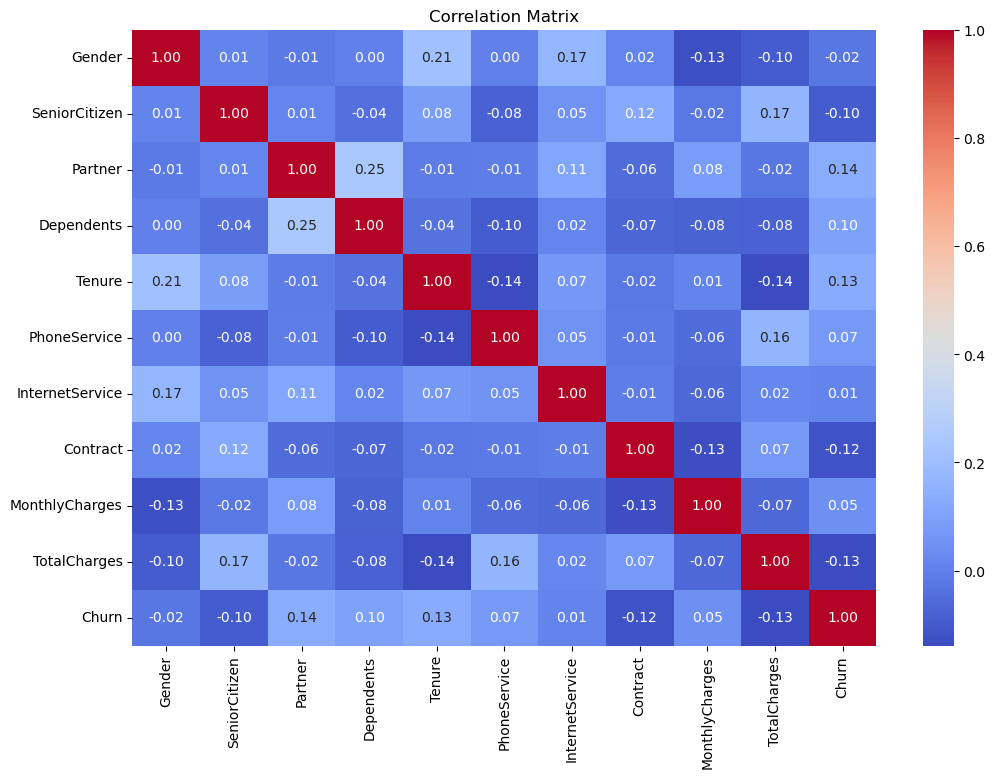

In [25]:

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [27]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
model = RandomForestClassifier(n_estimators=100, random_state=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [39]:
y_pred = model.predict(X_test)

In [41]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[5 5]
 [5 5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50        10
           1       0.50      0.50      0.50        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.50        20
weighted avg       0.50      0.50      0.50        20



In [43]:
importances = model.feature_importances_
features = df.drop('Churn', axis=1).columns

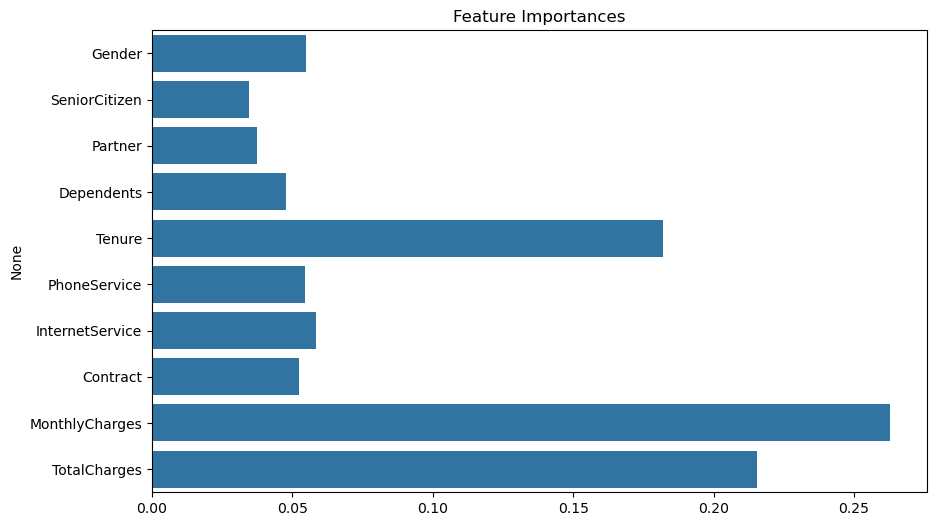

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.show()

In [47]:
import joblib
joblib.dump(model, 'churn_model.pkl')


['churn_model.pkl']